# Training CNN image classifier

## relevant imports

In [1]:
import os
from numpy import block
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

## Setup

In [2]:
train_data_dir = '../../datasets/car-planes-224/train'
validation_data_dir = '../../datasets/car-planes-224/test'

img_width, img_height = 224, 224
image_size = (img_width, img_height)

batch_size = 32

## Datasets

Found 400 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


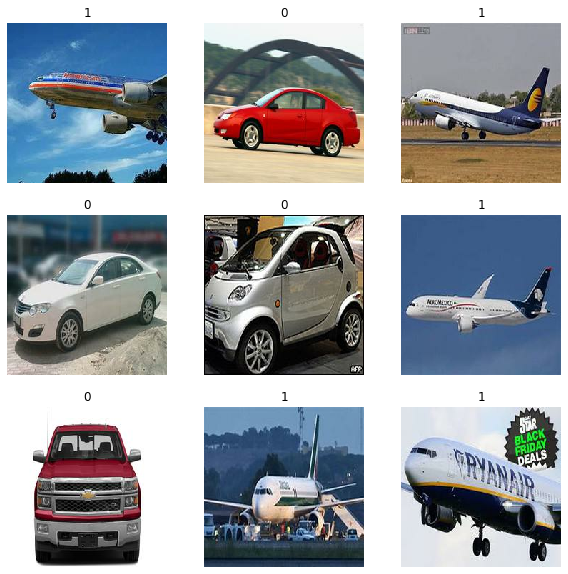

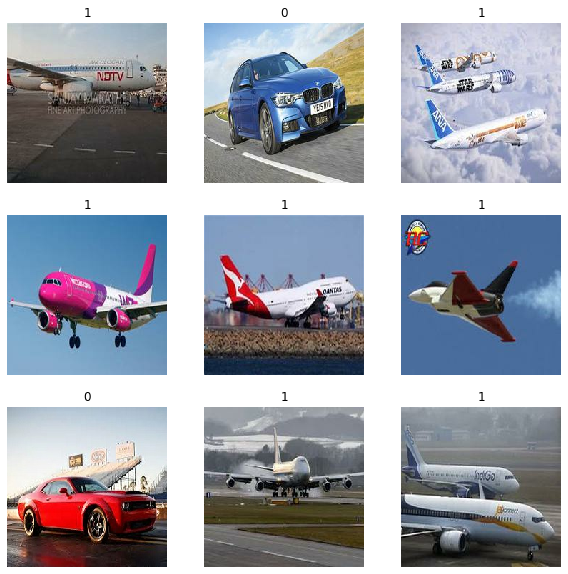

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir, image_size=image_size, batch_size=batch_size
)
valilidation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir, image_size=image_size, batch_size=batch_size
)

def draw_dataset_sample(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
    plt.show()

draw_dataset_sample(train_ds)
draw_dataset_sample(valilidation_ds)

train_ds = train_ds.map(lambda x, y: (tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(x), y))
valilidation_ds = valilidation_ds.map(lambda x, y: (tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(x), y))

train_ds = train_ds.prefetch(buffer_size=32)
valilidation_ds = valilidation_ds.prefetch(buffer_size=32)

## defining model

In [4]:
def make_model(input_shape):
    model = keras.models.Sequential()

    model.add(keras.layers.Conv2D(32, (2, 2), input_shape=input_shape))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(32, (2, 2)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(64, (2, 2)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation('sigmoid'))

    return model

model = make_model(input_shape=image_size + (3,))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## training

In [5]:

callbacks = [
    keras.callbacks.ModelCheckpoint("output_model/by_epoch/save_at_{epoch}.h5"),
]

history = model.fit(train_ds, epochs=10, callbacks=callbacks, validation_data=valilidation_ds)

Epoch 1/10
13/13 [==============================] - 27s 2s/step - loss: 1.2667 - accuracy: 0.5650 - val_loss: 0.4788 - val_accuracy: 0.8300
Epoch 2/10
13/13 [==============================] - 38s 3s/step - loss: 0.5683 - accuracy: 0.7125 - val_loss: 0.3256 - val_accuracy: 0.8700
Epoch 3/10
13/13 [==============================] - 30s 2s/step - loss: 0.6024 - accuracy: 0.8100 - val_loss: 0.4269 - val_accuracy: 0.7800
Epoch 4/10
13/13 [==============================] - 14s 1s/step - loss: 0.4024 - accuracy: 0.8375 - val_loss: 0.2772 - val_accuracy: 0.8900
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.3764 - accuracy: 0.8550 - val_loss: 0.3138 - val_accuracy: 0.8900
Epoch 6/10
13/13 [==============================] - 14s 1s/step - loss: 0.2744 - accuracy: 0.8975 - val_loss: 0.3253 - val_accuracy: 0.8700
Epoch 7/10
13/13 [==============================] - 19s 1s/step - loss: 0.2521 - accuracy: 0.9100 - val_loss: 0.2696 - val_accuracy: 0.9100
Epoch 8/10
13/13 [==

## Output training results

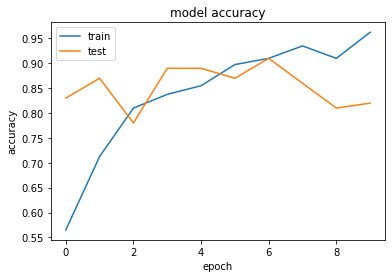

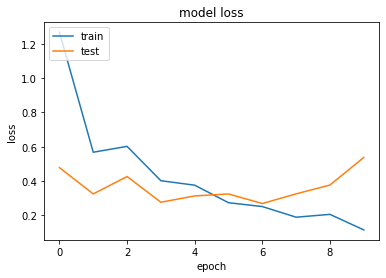

In [6]:
keras.utils.plot_model(model, to_file='output_model/model.png', show_shapes=True)

model.save("output_model/model.h5")

def print_hsitory(history):

    plot1 = plt.figure(1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plot1 = plt.figure(2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print_hsitory(history)